In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Arbitrary model parameters

C_m = 1.0  # membrane capacitance (uF/cm^2)
g_K = 36.0  # maximal conductance of potassium channels (mS/cm^2)
g_Na = 120.0  # maximal conductance of sodium channels (mS/cm^2)
g_L = 0.3  # maximal conductance of leak channels (mS/cm^2)
E_K = -77.0  # reversal potential for potassium channels (mV)
E_Na = 50.0  # reversal potential for sodium channels (mV)
E_L = -54.387  # reversal potential for leak channels (mV)

$I_{e}(t)=0, 0\leq t<10; I_{e}(t)=10, 10\leq t\leq 50; I_{e}(t)=0, 50<t<\infty$

In [3]:
# Define external current input (uA/cm^2)

def I_e(t):
    if 10 <= t <= 50:
        return 10.0
    else:
        return 0.0

In [4]:
# Define gating variable functions
def alpha_n(V):
    return 0.01 * (V + 55.0) / (1.0 - np.exp(-0.1 * (V + 55.0)))

def beta_n(V):
    return 0.125 * np.exp(-0.0125 * (V + 65.0))

def alpha_m(V):
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-0.1 * (V + 40.0)))

def beta_m(V):
    return 4.0 * np.exp(-0.0556 * (V + 65.0))

def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65.0))

def beta_h(V):
    return 1.0 / (1.0 + np.exp(-0.1 * (V + 35.0)))

In [5]:
# Defining the Hodgkin-Huxley equations

def dXdt(X, t):
    V, n, m, h = X.T
    I_K = g_K * n**4 * (V - E_K)
    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_L = g_L * (V - E_L)
    I_m = I_K + I_Na + I_L
    dVdt = (I_e(t) - I_m) / C_m
    dndt = alpha_n(V) * (1.0 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1.0 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1.0 - h) - beta_h(V) * h
    return np.vstack([dVdt, dndt, dmdt, dhdt]).T

In [6]:
# Initial conditions

X0 = [-65.0, 0.3177, 0.0529, 0.5961]

In [7]:
# Time vector

t = np.arange(0.0, 100.0, 0.01)

In [8]:
# Using the fourth-order Runge-Kutta method to solve the equations

X = np.zeros((len(t), 4))
X[0, :] = X0
for i in range(len(t) - 1):
    k1 = dXdt(X[i, :], t[i])
    k2 = dXdt(X[i, :] + 0.5 * k1 * (t[i+1] - t[i]), t[i] + 0.5 * (t[i+1] - t[i]))
    k3 = dXdt(X[i, :] + 0.5 * k2 * (t[i+1] - t[i]), t[i] + 0.5 * (t[i+1] - t[i]))
    k4 = dXdt(X[i, :] + k3 * (t[i+1] - t[i]), t[i+1])
    X[i+1, :] = X[i, :] + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

<ipython-input-4-da2c6442f8f5>:3: RuntimeWarning: overflow encountered in exp
  return 0.01 * (V + 55.0) / (1.0 - np.exp(-0.1 * (V + 55.0)))
<ipython-input-4-da2c6442f8f5>:6: RuntimeWarning: overflow encountered in exp
  return 0.125 * np.exp(-0.0125 * (V + 65.0))
<ipython-input-4-da2c6442f8f5>:9: RuntimeWarning: overflow encountered in exp
  return 0.1 * (V + 40.0) / (1.0 - np.exp(-0.1 * (V + 40.0)))
<ipython-input-4-da2c6442f8f5>:12: RuntimeWarning: overflow encountered in exp
  return 4.0 * np.exp(-0.0556 * (V + 65.0))
<ipython-input-4-da2c6442f8f5>:15: RuntimeWarning: overflow encountered in exp
  return 0.07 * np.exp(-0.05 * (V + 65.0))
<ipython-input-4-da2c6442f8f5>:18: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-0.1 * (V + 35.0)))
<ipython-input-5-4744ae7af207>:10: RuntimeWarning: invalid value encountered in multiply
  dndt = alpha_n(V) * (1.0 - n) - beta_n(V) * n
<ipython-input-5-4744ae7af207>:11: RuntimeWarning: invalid value encountered in multi

In [9]:
# Extracting the membrane potential and gating variables

V = X[:, 0]
n = X[:, 1]
m = X[:, 2]
h = X[:, 3]

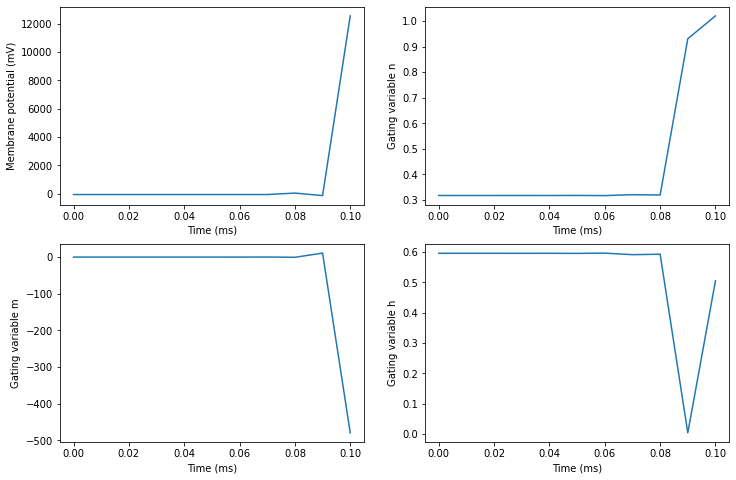

In [10]:
# Plot the results

plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, V)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.subplot(2, 2, 2)
plt.plot(t, n)
plt.xlabel('Time (ms)')
plt.ylabel('Gating variable n')
plt.subplot(2, 2, 3)
plt.plot(t, m)
plt.xlabel('Time (ms)')
plt.ylabel('Gating variable m')
plt.subplot(2, 2, 4)
plt.plot(t, h)
plt.xlabel('Time (ms)')
plt.ylabel('Gating variable h')
plt.show()